In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("PS_2025.11.12_10.43.30.csv", comment="#")


In [4]:
df.shape
print(df.columns.tolist())
#Dont understand ['pl_eqt', 'pl_bmassj', 'st_teff', 'pl_orbper', 'st_rad']


['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

In [ ]:
# Label: Planet Name
# Database Column Name: pl_name
# Description: Official name of the exoplanet in the NASA catalog
# Each planet has a unique ID used in scientific papers

# Label: Host Name
# Database Column Name: hostname
# Description: The name of the star system that the planet orbits
# This is the name of the host star

# Label: Discovery Method
# Database Column Name: discoverymethod
# Description: How astronomers detected the planet
# It tells us which detection technique found the planet

# Label: Spectral Type
# Database Column Name: st_spectype
# Description: Classification of the host star based on temperature and color 
# Helps identify whether the star is like our sun or much cooler/hotter

# Label: Equilibrium Temperature
# Database Column Name: pl_eqt
# Description: The planet's estimated temperature based on distance from its star
# Shows how hot or cold the planet is

# Label: Planet Mass [Jupiter Mass]
# Database Column Name: pl_bmassj
# Description: The mass of the planet expressed in Jupiter masses
# Helps compare planet size to Jupiter


In [5]:
cols = ['pl_name', 'hostname', 'discoverymethod', 'st_spectype', 'pl_eqt', 'pl_bmassj']
df_small = df[cols].dropna()


print("Shape:", df_small.shape)
df_small.head()


Shape: (67, 6)


,pl_name,hostname,discoverymethod,st_spectype,pl_eqt,pl_bmassj
2,DMPP-1 b,DMPP-1,Radial Velocity,F8 V,877.0,0.076362
3,DMPP-1 c,DMPP-1,Radial Velocity,F8 V,1239.0,0.030205
4,DMPP-1 d,DMPP-1,Radial Velocity,F8 V,1632.0,0.010540
5,DMPP-1 e,DMPP-1,Radial Velocity,F8 V,1314.0,0.012994
6,DMPP-2 b,DMPP-2,Radial Velocity,F5 V,1000.0,0.437000


In [6]:
method_counts = df_small['discoverymethod'].value_counts()
print(method_counts)


discoverymethod
Transit            52
Radial Velocity    13
Imaging             2
Name: count, dtype: int64


In [ ]:
#Radical Velocity and Transit are the most common discovery methods. 
#Radial Velocity detects the wobble in a star caused by orbiting planets, 
#while Imaging directly captures light from the planet itself

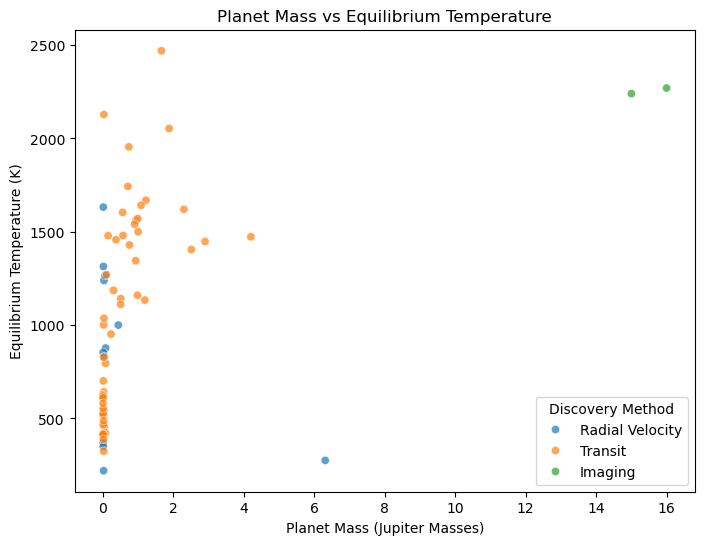

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_small, 
    x='pl_bmassj', 
    y='pl_eqt', 
    hue='discoverymethod',
    alpha=0.7
)
plt.title("Planet Mass vs Equilibrium Temperature")
plt.xlabel("Planet Mass (Jupiter Masses)")
plt.ylabel("Equilibrium Temperature (K)")
plt.legend(title="Discovery Method")
plt.show()


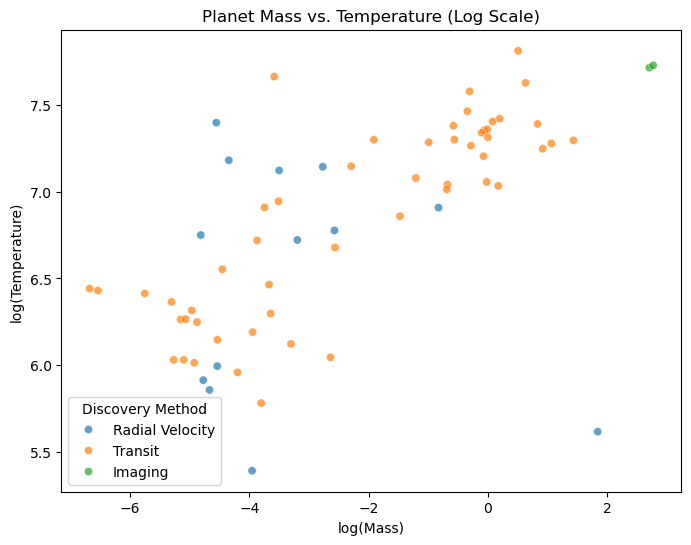

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_small,
    x=np.log(df_small['pl_bmassj']),
    y=np.log(df_small['pl_eqt']),
    hue='discoverymethod',
    alpha=0.7
)
plt.title("Planet Mass vs. Temperature (Log Scale)")
plt.xlabel("log(Mass)")
plt.ylabel("log(Temperature)")
plt.legend(title="Discovery Method")
plt.show()


In [9]:
coldest = df_small[df_small['pl_bmassj'] > 5].sort_values('pl_eqt').head(1)
print(coldest)


         pl_name   hostname  discoverymethod st_spectype  pl_eqt  pl_bmassj
566  eps Ind A b  eps Ind A  Radial Velocity        K5 V   275.0       6.31


In [10]:
planet_name = coldest['pl_name'].values[0]
index = coldest.index[0]
temp = coldest['pl_eqt'].values[0]
mass = coldest['pl_bmassj'].values[0]
star_type = coldest['st_spectype'].values[0]

print(f"Name: {planet_name}")
print(f"Index: {index}")
print(f"Equilibrium Temperature: {temp:.1f} K")
print(f"Mass: {mass:.2f} Jupiter masses")
print(f"Host Star Type: {star_type}")


Name: eps Ind A b
Index: 566
Equilibrium Temperature: 275.0 K
Mass: 6.31 Jupiter masses
Host Star Type: K5 V


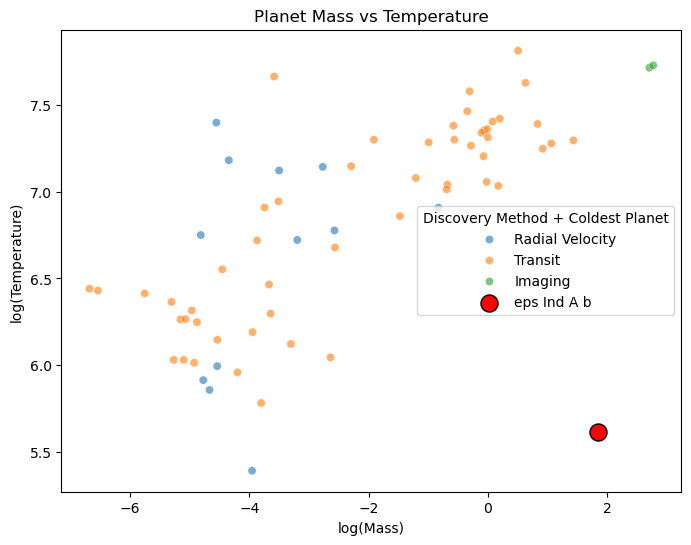

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_small,
    x=np.log(df_small['pl_bmassj']),
    y=np.log(df_small['pl_eqt']),
    hue='discoverymethod',
    alpha=0.6
)

plt.scatter(
    np.log(coldest['pl_bmassj']),
    np.log(coldest['pl_eqt']),
    color='red', s=150, edgecolor='black', label=planet_name
)

plt.title("Planet Mass vs Temperature")
plt.xlabel("log(Mass)")
plt.ylabel("log(Temperature)")
plt.legend(title="Discovery Method + Coldest Planet")
plt.show()


In [ ]:
Nature Article:
Title: A temperate super-Jupiter imaged with JWST in the mid-infrared
Abstract summary: The paper describes the discovery of Epsilon Indi Ab, 
a giant planet about 6 times the mass of Jupiter that was directly 
imaged by JWST. It orbits a K-type star and is extremely cold, around 
275K, making it the coldest planet ever directly photographed. 
Yes, my coldest planet above 5 Jupiter masses is almost identical 
in mass, temperature, and discovery method.

This planet is special because its one of the coldest and largest exoplanets ever discovered
Yes, both have a mass of about 6 Jupiter masses and an equilibrium temperature around 275 K.
    
